Проект "Влияние различных факторов на отсутствие сотрудников на рабочем месте"

Цель:
выявить, какие факторы в наибольшей степени влияют на отсутсвие сотрудников.

Гипотезы:
H0: Отсутствие на рабочем месте связано с возратсом сотрудников;
Н1: Отсутствие на рабочем месте связано с полом сотрудников;
Н2: Отсутствие на рабочем месте связано с занимаемой должностью.

Участники: 
Диасамидзе Наталия
Болотина Анастасия
Шленова Екатерина
Юрчак Юлия

Источники:
Материалы и ссылки из лекций
Дополнительные источники (гугл)
https://ru.stackoverflow.com/questions/927487/%D0%9A%D0%B0%D0%BA-%D1%8D%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE-%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%B8%D1%82%D1%8C-%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D1%83-%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D0%B8-%D0%B4%D0%BB%D1%8F-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0
https://habr.com/ru/post/468295/

Содержание проекта:
1) Подготовка данных для анализа
2) Визуализация
3) Корреляционный анализ
4) Регрессионный анализ
5) Выводы



In [120]:
#подключаем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [121]:
#подгружаем данные
path = "https://raw.githubusercontent.com/NDi-ze/python-project/master/datasets_660_1258_MFGEmployees4%20(2).csv"

df = pd.read_csv(path)
df.head()

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores


In [122]:
# "выбрасываем" лишние колонки-факторы, оставим только Age, Gender, LengthService, DepartmentName
df = df.drop(['Surname', 'GivenName', 'JobTitle','BusinessUnit', 'StoreLocation', 'City', 'Division'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 6 columns):
EmployeeNumber    8336 non-null int64
Gender            8336 non-null object
DepartmentName    8336 non-null object
Age               8336 non-null float64
LengthService     8336 non-null float64
AbsentHours       8336 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 390.8+ KB


In [123]:
#опишем датасет
df.describe()

,EmployeeNumber,Age,LengthService,AbsentHours
count,8336.000000,8336.000000,8336.000000,8336.000000
mean,4168.500000,42.007086,4.782910,61.283978
std,2406.540255,9.939798,2.462990,49.038365
min,1.000000,3.504743,0.012098,0.000000
25%,2084.750000,35.298748,3.575892,19.127590
50%,4168.500000,42.114924,4.600248,56.005808
75%,6252.250000,48.666943,5.623922,94.284692
max,8336.000000,77.938003,43.735239,272.530123


In [124]:
#проверим, есть ли в датасете пропущенные значения (false - нет пропущенных значений)
df.isnull().values.any()

False

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



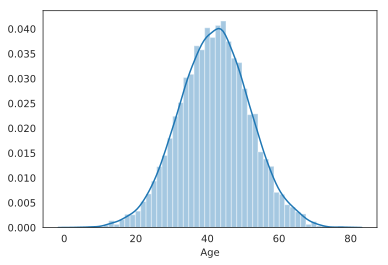

In [125]:
#визуалы
sns_plot = sns.distplot(df['Age']) #распределение возрастов, просто для интереса, особой ценности не несет
fig = sns_plot.get_figure()

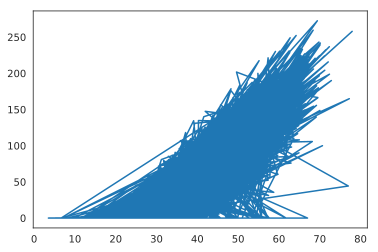

In [126]:
#визуалы
plt.plot(df['Age'], df['AbsentHours']) #видим, что зависимость возраста и отсутсвия нелинейна, но я не уверена, что все правильно сделала


In [127]:
#у нас есть такие факторы, как Gender и DepartmentName, которые в формате Object. Нам это не подходит, потому требуется привести эти данные к другому формату, т.е. провести кодирование
label = LabelEncoder()
dicts = {}

label.fit(df.Gender.drop_duplicates()) #задаем список значений для кодирования
dicts['Gender'] = list(label.classes_)
df.Gender = label.transform(df.Gender) #заменяем значения из списка кодами закодированных элементов из списка

label.fit(df.DepartmentName.drop_duplicates())
dicts['DepartmentName'] = list(label.classes_)
df.DepartmentName = label.transform(df.DepartmentName)


df.head()

,EmployeeNumber,Gender,DepartmentName,Age,LengthService,AbsentHours
0,1,0,4,32.028816,6.018478,36.577306
1,2,1,4,40.320902,5.532445,30.165072
2,3,1,4,48.822047,4.389973,83.807798
3,4,0,4,44.599357,3.081736,70.020165
4,5,1,4,35.697876,3.619091,0.000000


In [128]:
#проверим, помнялся ли формат данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 6 columns):
EmployeeNumber    8336 non-null int64
Gender            8336 non-null int64
DepartmentName    8336 non-null int64
Age               8336 non-null float64
LengthService     8336 non-null float64
AbsentHours       8336 non-null float64
dtypes: float64(3), int64(3)
memory usage: 390.8 KB


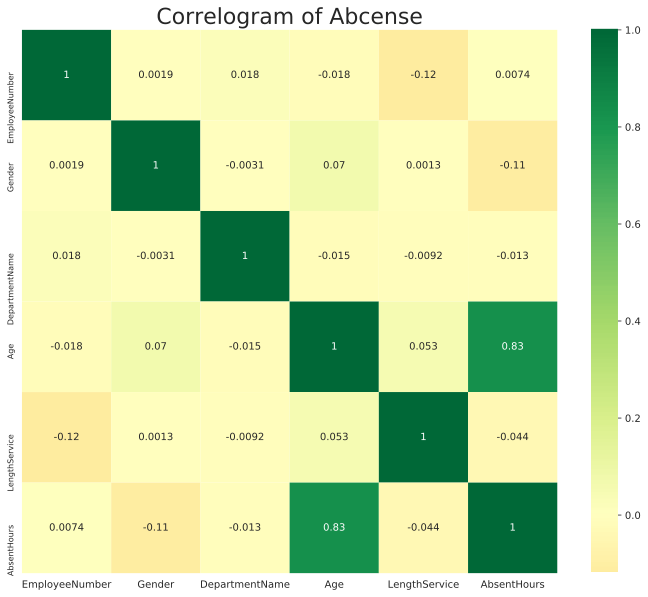

In [129]:
#построим карту корреляции, предполагая, что будет корреляция пол-отсутвие и возраст-отсутсвие
# сама карта
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Дизайн
plt.title('Correlogram of Abcense', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
#Исходя из протестированных данных, подтверждается только H0: Отсустствие на рабочем месте связано с возрастом сотрудников

In [130]:
#Мы обнаружили, что есть корреляция между возрастом и отсутсвием, но практически нет корреляции между полом и отсутсвием, проверим точечно
x = df['Age']
y = df['AbsentHours']
x.corr(y, method = "kendall") #корреляция по Кендаллу

0.6584462807667683

In [131]:
ss.kendalltau(x, y) #можно верить, если pvalue <0,05

KendalltauResult(correlation=0.6584462807667683, pvalue=0.0)

In [132]:
#Смотрим корреляцию возраст-отсутсвие, видим, что она отсуствует
x = df['Gender']
y = df['AbsentHours']
x.corr(y, method = "kendall")

-0.07691002800554961

In [133]:
ss.kendalltau(x, y)

KendalltauResult(correlation=-0.07691002800554961, pvalue=1.775266544307561e-17)

In [134]:
#Видим, что корр. по Кендаллу показывает несколько другие значения, нежели на карте, поэтому проверим по Пирсону
x = df['Age']
y = df['AbsentHours']
x.corr(y, method = "pearson")

0.8302340705835789

In [135]:
x = df['Gender']
y = df['AbsentHours']
x.corr(y, method = "pearson") 

-0.10895157833930744

In [136]:
#По Спирмену 
x = df['Age']
y = df['AbsentHours']
x.corr(y, method = "spearman")


0.8419484735364768

In [137]:
x = df['Gender']
y = df['AbsentHours']
x.corr(y, method = "spearman")

-0.09318708458506801

In [138]:
#Регрессия
x = np.array(df['Age']).reshape((-1, 1))
y = np.array(df['AbsentHours'])
model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.6892886119577792


In [139]:
print('intercept:', model.intercept_) #модель покажет это значение при х=0

print('slope:', model.coef_) #шаг модели при x+1 (угол наклона)

intercept: -110.77665992993727
slope: [4.09599083]


In [140]:
 y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 20.41307531  54.37738341  89.1979951  ... 128.21277404  66.74610384
  78.42855101]


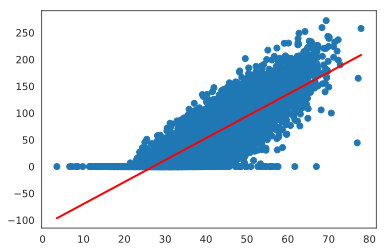

In [141]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', linewidth=2);

In [144]:
#Проверка качества модели
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 745.349, test: 751.279
R^2 train: 0.690, test: 0.688


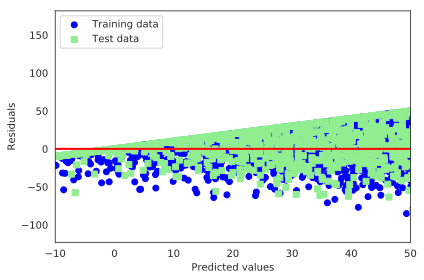

In [146]:

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=80, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

Выводы: 
В ходе исследования подтвердилась только Н0: отсуствие сотрудников на рабочем месте связано с их возрастом.